# DATASET 5 – Avacado prices

# 1. Data Understanding & Problem Framing

In [ ]:
Datasource: Kaggle
Real-world context:The dataset represents weekly retail avocado sales across multiple U.S. regions, capturing both price and volume trends.

In [ ]:
Problem Statement: Predict the AveragePrice of avocados based on sales volume, type, region, and time features.
This is a Supervised Regression Problem.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/sneha/Downloads/data/avocado.csv")

In [5]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.shape

(18249, 14)

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
The dataset contains 18249 rows and 14 columns.
The target variable is “Average price” (It is economically meaningful.It is influenced by other variables.)

In [ ]:
Numerical features: Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Categorical: type, region
Datetime: Date

# 2. DATA PREPROCESSING

In [16]:
#Missing check
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
No missing values in the dataset.
Because there is no missing data, we avoid introducing artificial bias.

In [18]:
# duplicate check
df.duplicated().sum()

0

In [ ]:
Removing duplicates is not necessary.

In [20]:
# drop irrelevant column
# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
This column is only an index and has no predictive value.

In [22]:
# Convert Date Column & Extract Features
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time features
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

# Drop original Date column (optional for regression)
df.drop(columns=['Date'], inplace=True)

df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week,Quarter
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,52,4
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,51,4
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,50,4
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,49,4
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,48,4


In [ ]:
Machine learning models cannot interpret raw dates. Extracted features capture seasonality.

In [24]:
# handle skewness
df.skew(numeric_only=True)

AveragePrice     0.580303
Total Volume     9.007687
4046              8.64822
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags        9.54066
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Week             0.108331
Quarter          0.110514
dtype: Float64

In [26]:
#apply log transformation
# Columns to transform
volume_columns = [
    'Total Volume', '4046', '4225', '4770',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
]

for col in volume_columns:
    df[col] = np.log1p(df[col])  # log(1+x) handles zero values

df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week,Quarter
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,2015,Albany,12,52,4
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,2015,Albany,12,51,4
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,2015,Albany,12,50,4
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,2015,Albany,12,49,4
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,2015,Albany,11,48,4


In [ ]:
Why use log1p?
Because some values are 0 → normal log() would fail.
Reduces skewness
Improves regression stability
Reduces influence of extreme values

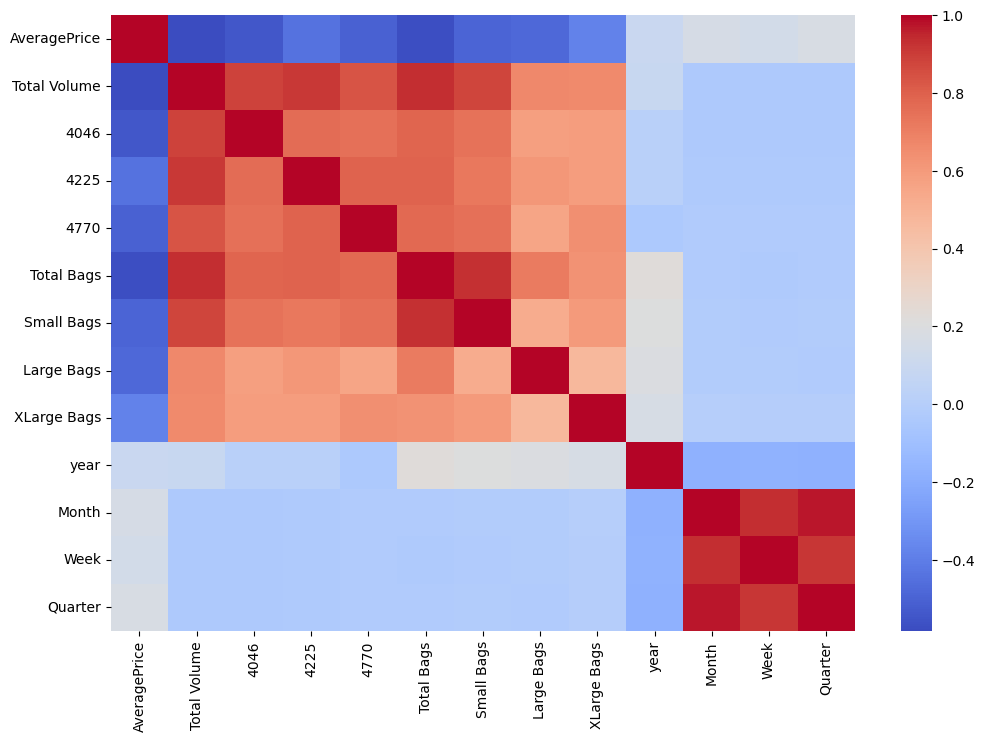

In [28]:
# multicollinearity
# check correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.show()

In [ ]:
Correlation analysis revealed severe multicollinearity among aggregated volume variables and derived time features. Multicollinearity has been identified but not prematurely resolved, ensuring flexibility in subsequent model selection while preserving the dataset’s informational integrity

In [30]:
# encoding categorical variables
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

In [34]:
# standardization

from sklearn.model_selection import train_test_split

X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Exploratory Data Analysis & Visualization

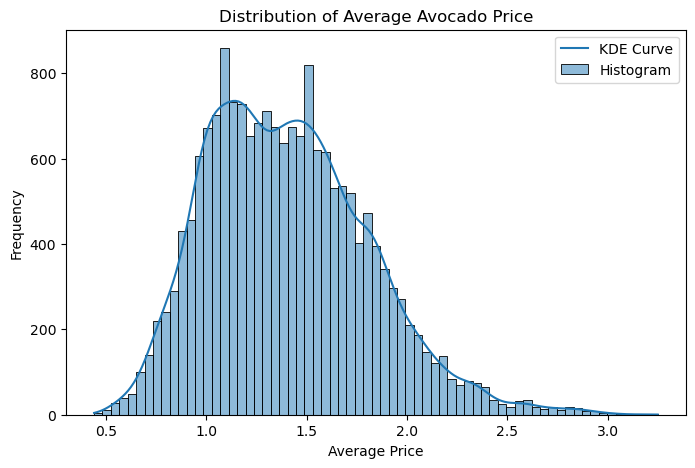

In [36]:
#Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(df['AveragePrice'], kde=True)

plt.title("Distribution of Average Avocado Price")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.legend(["KDE Curve", "Histogram"])
plt.show()


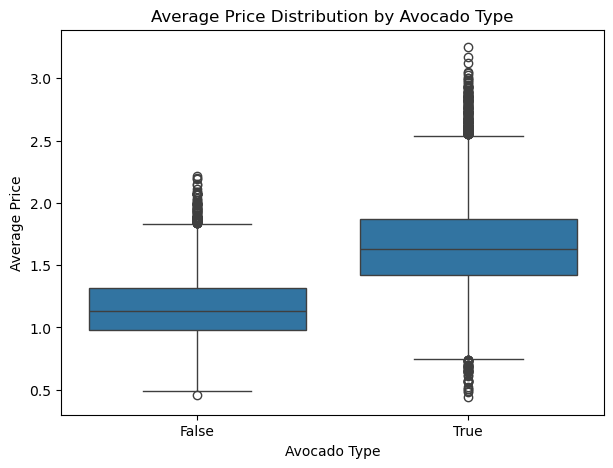

In [46]:
# price comparison by type
plt.figure(figsize=(7,5))
sns.boxplot(x='type_organic', y='AveragePrice', data=df)

plt.title("Average Price Distribution by Avocado Type")
plt.xlabel("Avocado Type")
plt.ylabel("Average Price")
plt.show()

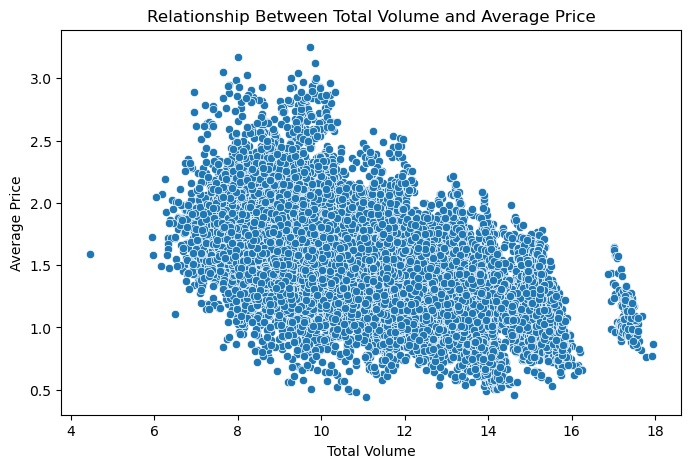

In [40]:
# feature vs target relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total Volume'], y=df['AveragePrice'])

plt.title("Relationship Between Total Volume and Average Price")
plt.xlabel("Total Volume")
plt.ylabel("Average Price")
plt.show()

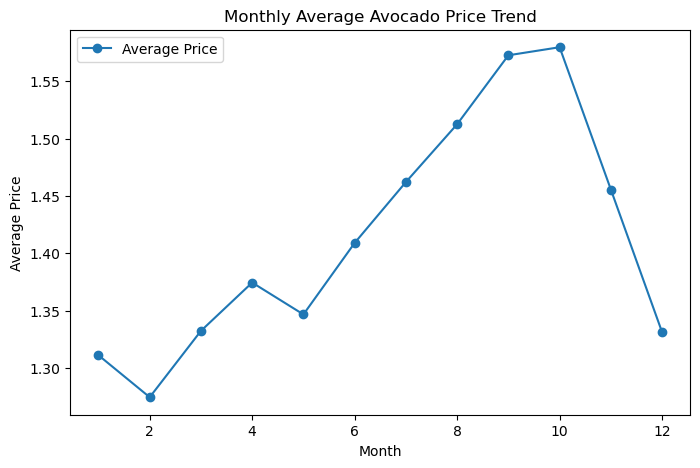

In [44]:
#Temporal Trend of Average Price
monthly_avg = df.groupby('Month')['AveragePrice'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
monthly_avg.plot(marker='o')

plt.title("Monthly Average Avocado Price Trend")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(["Average Price"])
plt.show()


# 4. Insights, Observations & Modeling Readiness